# Short Term Interest Rate Models

Interest rate movements play an important role in investment decisions and risk management in financial markets. A popular class of models used for these purposes is the *one factor* models. These models are especially important in the pricing of interest rate derivatives. One factor models are represented by the following Stochastic Differential Equation (SDE):

$$ dr(t) = \mu(t, r(t))dt + \sigma(t, r(t))dB(t)$$

In the above equation, $\mu$ and $\sigma$ represent the drift and diffusion terms of the interest rate process respectively, and $(B(t))_{t \geq 0}$.

Interest rates exhibit a different behavior from stock prices and require the that specific models be developed to account for properties such as posiitivity, boundedness, and return to equilibrium. Vasicek in 1997 assumed  the instantaneous spot rate under the real world measure evloves as an Orstien-Uhlenbeck process with constant coefficients.

He introduced the first model to capture the mean reversion property of interest rates, a property not possesed by Browninan motion. The Vasisek model is based on the Ornstien-Uhlenbeck process, the short term rate process $(r_t)_{t \in \mathbb{R}_{+}}$ solves the SDE

$$ dr(t) = \alpha(\beta - r(t))dt + \sigma dB(t), r(0) = r_{0}$$


This is a particular case of the previous SDE with $\mu(t, r(t)=\alpha(\beta - r(t))$, and $\sigma(t, r(t)) = \sigma$. The most important feature of this model is the fact that it exhibits the mean reversion. That is if the interest rate is larger than the long term average ($r> \beta$) then the coefficient $\alpha (>0)$ causes the drift  to be negative so that the rate is pulled down towards $\beta$. In a similar fashion, if the rate is less than the long run mean ($r < \beta$), then the $\alpha$ causes the rate to become positive and pulls the rate down towards $\beta$. Therfore $\alpha$ is the revesion speed twowards the long run average.

The are compelling economic argument in favor of mean reversion. Higher rates lead to a slow down in the economy and borrowers will tend to borrow less. Furthermore the rates pull back to equillibrium and rates decline. On the other hand, when rates are low, there is a high demand for funds which in turn causes rates to rise back to the equilibrium position. Without the reversion to the mean, rates could either continually drit upwards or downwards, a phenomenon that is not observed in practice. 

Another attractive feature of the Vasicek model is the fact that it possess a closed form solution unlike most SDEs. 
The closed form solution to the above equation can be obtained by applying the well known Ito formula. The closed form sloution to the above equation is given by 

$$ r(t) = e^{-\alpha t}\left[r_0 + \int_{0}^{t}\alpha \beta e^{-\alpha u}du +\sigma \int_{0}^{t}e^{\alpha u} dB(u) \right]$$

This further simplifies to

$$ r(t) = e^{-\alpha t}r_0 + \beta \left( 1 -e^{-\alpha t} \right) +\sigma \int_{0}^{t}e^{\alpha (u-t)} dB(u)$$

The above expresion shows that the interet rate is normally distributed with expected value

$$ \mathbb{E}[r(t)] = e^{-\alpha t}r_0 + \beta \left( 1 -e^{-\alpha t} \right)$$

and variance 

$$ \mathbb{V}[r(t)] = \frac{\sigma^{2}}{2\beta}\left ( 1- e^{-2\beta t} \right )$$

Note that the mean and variance are obtianed via the properties of Gaussian integrals and the Ito isometry formula. Based on the properties of stochastic intergrals the expresion above is a Gaussian random variable. An unfortunate consequence of rates with Gaussian distributions is that these rates can be negative. However, for $\alpha >0$ and as $ t \to \infty$ the mean converges to $\beta$ and the variance converges to $\frac{\sigma^{2}}{2\beta}$.


The Vasicek and Cox-Ingersoll-Ross model are two of the most important interest rate models used in pricing interest rate derivatives. Sample paths of SDEs are typically obtained via some similultion algorithm one of which is the ell known Euler scheme. The Euler descritization of the Vasicek  model is given by 

$$ r(t_{k+1}) = r(t_{k}) + \alpha\left [\beta - r(t_{k})\right ]\Delta t + \sigma\sqrt{\Delta t}Z_{k+1}$$

This can be further written as 

$$ r(t_{k+1}) = \alpha \beta \Delta t + \left(1- \alpha \Delta t \right )r(t_{k}) + \sigma\sqrt{\Delta t}Z_{k+1}$$

Notice that the last term in the expression above is follows a normal distribution with a mean of zero and a variance of $\sigma^{2}\Delta t$. This expression can be rewritten as 

$$ r(t_{k+1}) = a + b r(t_{k}) + \epsilon_t$$

Here, $a = \alpha \beta \Delta t$, $b = \left(1- \alpha \Delta t \right )$ and $\epsilon = \sigma\sqrt{\Delta t}Z_{k+1}$. This means that Vasicek model parameters can be estimated using ordinary least squares regression. The repsonse variable here $r(t_{k+1})$ and the predictor variables in $r(t_{k})$. The following expression can be used in the simulation of $r(t)$: 

$$ r_{t_k} = r_{t_{k-1}}e^{-\alpha (t_{k}-t_{k-1})} + \beta \left(1- e^{\alpha (t_{k}-t_{k-1})}\right) + Z \sqrt{\frac{\sigma^{2} \left ( 1 - e^{-2\alpha(t_{k}-t_{k-1})}\right )}{2\alpha}}$$

See https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/01/Calibrating-the-Ornstein.pdf for steps in calibrating a Vasicek model. In the above expression, $Z$ is a Standard Normal Random variable, $\beta$ represents the mean reversion strength, $\alpha$ is the long-run mean and $\sigma$ is the volatility. One way to calibrate the parameters in the model is  on a historical data and then use Monte-Carlo simulations to model rate paths.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes = True)

%matplotlib inline

In [128]:
# New Column Names
col_names ={"Date":"Date", "1 MO":"1MO", "2 MO":"2MO", "3 MO":"3MO", "6 MO":"6MO", 
            "1 YR":"1YR", "2 YR":"2YR", "3 YR":"3YR", "5 YR":"5YR", "7 YR":"7YR", "10 YR":"10YR", 
            "20 YR":"20YR", "30 YR":"30YR"}

# Read in data set and rename columns
dt_one = pd.read_csv('USTREASURY-YIELD.csv')
dt_one.rename(columns = col_names, inplace = True)
dt_one["Date"] = pd.to_datetime(dt_one["Date"], format='%Y%m%d', errors='ignore')

dd = dt_one
dt_two = dd.sort_values(by = 'Date')
dt_three = dt_two.drop(["1MO", "2MO"], axis = 1)

dt_four = dt_three.dropna()

In [129]:
def V_Next(r, alpha, beta, sigma, delta):
    v1 = np.exp(-1*alpha*delta)
    v2 = (sigma**2)*(1-v1**2)/(2*alpha)
    expression = r*v1 + beta*(1-v1) + (np.sqrt(v2))*np.random.normal()
    
    return expression

def V_Sim(N, r0, alpha, beta, sigma, delta):
    short_rate = [0]*N
    short_rate[0] = r0
    
    for i in range(1, N):
        short_rate[i] = V_Next(short_rate[i-1], alpha, beta, sigma, delta)
    
    return short_rate

def V_M_Sim(M, N, r0, alpha, beta, sigma, delta):
    
    short_rate_array = np.ndarray((N, M))
    
    for k in range(0, M):
        
        short_rate_array[:, k] = V_Sim(N, r0, alpha, beta, sigma, delta)
        
    return short_rate_array

def V_Calibration(rates, delta):
    
    n = len(rates)
    
    r_n_1 = rates[0:(n-1)]
    r_n = rates[1:n]
    
    Sx = sum(r_n_1)
    Sy = sum(r_n)
    
    Sxx = np.dot(r_n_1, r_n_1)
    Sxy = np.dot(r_n_1, r_n)
    Syy = np.dot(r_n, r_n)
    
    beta = (Sy*Sxx - Sx*Sxy)/(n*(Sxx-Sxy)-(Sx**2 - Sx*Sy))
    alpha = -np.log((Sxy - beta*Sx - beta*Sy + n*beta**2)/(Sxx - 2*beta*Sx + n*beta**2))/delta
    
    a = np.exp(-alpha*delta)
    
    sigma_sqr = (Syy -2*a*Sxy + a**2*Sxx - 2*beta*(1-a)*(Sy-a*Sx) + n*beta**2*(1-a)**2)/n
    sigma = np.sqrt(sigma_sqr*2*alpha)/(1-a**2)
    
    r0 = rates[n-1]
    
    return [beta, alpha, sigma ,r0] 

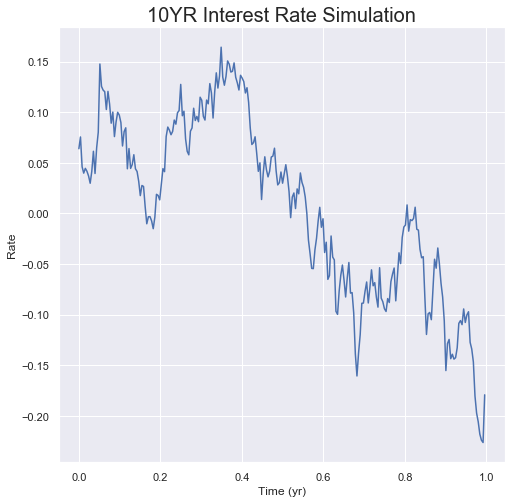

In [130]:
params = V_Calibration(dt_four.loc[:, '30YR'].dropna()/100, 1/252)

alpha = params[0]
beta = params[1]
sigma = params[2]
r0 = params[3]

years = 1
N = years*252
t = np.arange(0, N)/252

test_sim = V_Sim(N, r0, alpha, beta, sigma, 1/252)

plt.figure(figsize = (8, 8))
plt.plot(t, test_sim)
plt.xlabel("Time (yr)")
plt.ylabel("Rate")
plt.title("10YR Interest Rate Simulation", fontsize = 20)
plt.show()

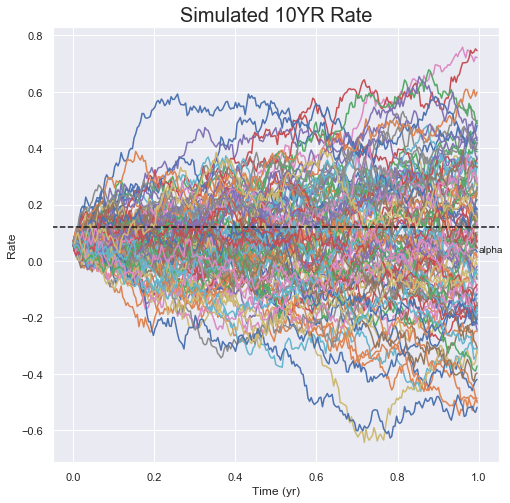

In [132]:
M = 100

dt = 1/252

rates_array = V_M_Sim(M, N, r0, alpha, beta, sigma,  dt)

plt.figure(figsize=(8, 8))
plt.plot(t, rates_array)
plt.hlines(y = beta, xmin = -100, xmax = 100, zorder = 10, linestyle = 'dashed', label = 'alpha')
plt.annotate('alpha', xy = (1.0, alpha+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (yr)")
plt.title("Simulated 10YR Rate", fontsize = 20)
plt.show()